In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load dataset
data = pd.read_csv("dataset/infolimpioavanzadoTarget.csv")

In [9]:
# Basic information
print("Dataset information:")
print(data.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB
None


In [10]:
# 5 rows of dataset
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
         date       open       high        low      close   adjclose  volume  \
0  2022-01-03  17.799999  18.219000  17.500000  17.760000  17.760000  106600   
1  2022-01-04  17.700001  18.309999  17.620001  17.660000  17.660000  128700   
2  2022-01-05  17.580000  17.799999  16.910000  16.950001  16.950001  103100   
3  2022-01-06  16.650000  16.879999  16.139999  16.170000  16.170000  173600   
4  2022-01-07  16.219999  16.290001  15.630000  15.710000  15.710000  137800   

  ticker  RSIadjclose15  RSIvolume15  ...  high-15  K-15  D-15  \
0   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
1   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
2   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
3   ASLE            NaN          NaN  ...      NaN   NaN   NaN   
4   ASLE            NaN          NaN  ...      NaN   NaN   NaN   

   stochastic-k-15  stochastic-d-15  stochastic-kd-15  volumenrelativo  \
0              N

In [11]:
# Statistics
data.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7347.000000,7262.000000,7194.000000,7262.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,37.947291,18.673824,18.704812,18.673824,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,107.340294,75.723295,74.210933,75.723295,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.565000,6.153839,8.336837,6.153839,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.640000,28.484828,28.478797,28.484828,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,25.170000,59.688404,58.664021,59.688404,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


In [12]:
# Misssing Values
data.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [13]:
plt.figure(figsize=(14,8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

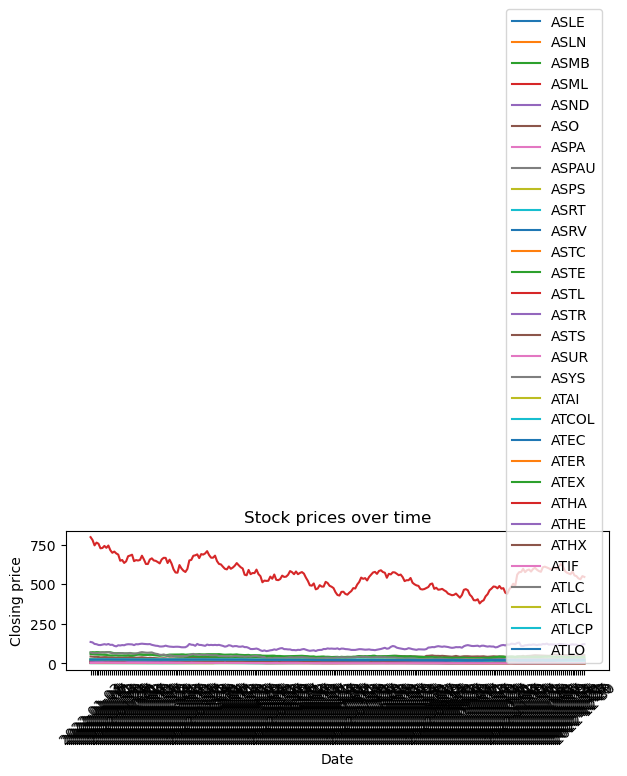

In [14]:
for stock in data['ticker'].unique():
    stock_data = data[data['ticker']==stock]
    plt.plot(stock_data['date'], stock_data['close'], label=stock)

plt.title('Stock prices over time')
plt.xlabel('Date')
plt.ylabel("Closing price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

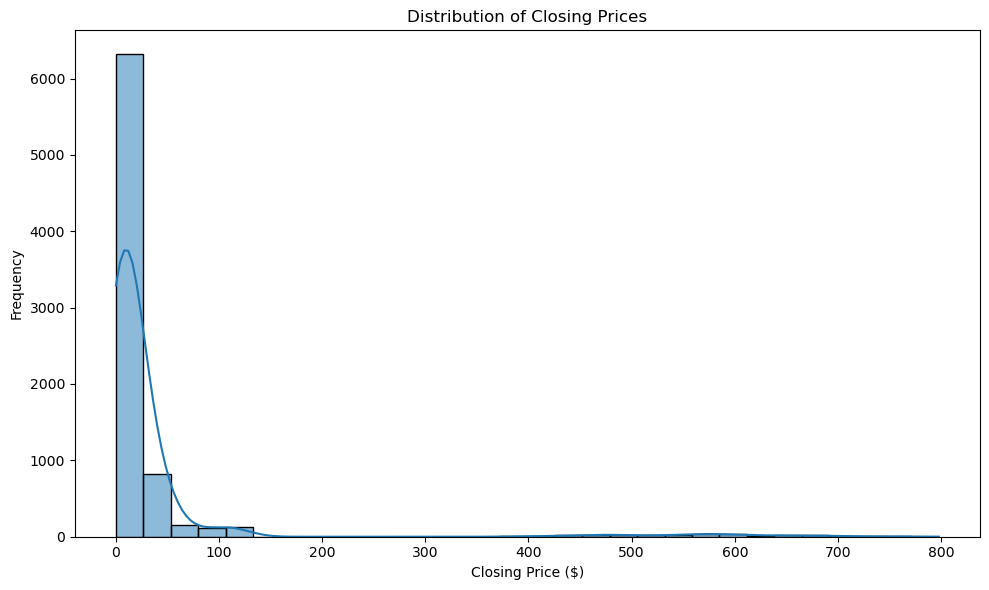

In [15]:
# Plotting the distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(data['close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

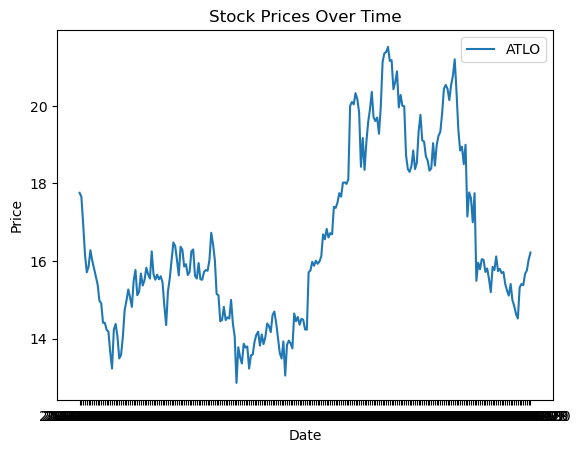

In [16]:
# ASLE stock graph
asle_data = data[data['ticker']=='ASLE']
plt.plot(asle_data['date'], asle_data['close'], label=stock)

plt.xlabel('Date')
plt.ylabel("Price")
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

# Model


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [18]:
data = pd.read_csv('dataset/infolimpioavanzadoTarget.csv')

In [19]:
# Drop rows where specific columns have null values
data.dropna(subset=['ticker', 'open', 'high', 'low', 'close', 'adjclose', 'volume'], inplace=True)

In [20]:
def train_and_predict(ticker, future_data):
    ticker_data = data[data['ticker']==ticker]

    # Split features and target variable for training
    X_train = ticker_data[['ticker', 'open', 'high', 'low', 'volume']]
    y_train = ticker_data['close']

    # Separate numeric and categorical columns
    numeric_features = X_train.select_dtypes(include=['float64']).columns.tolist()
    categorical_features = ['ticker']

    # Create preprocessing pipelines for numeric and categorical data
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing pipelines
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Append regression model to preprocessing pipelines
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    # Train the model
    model.fit(X_train, y_train)



    future_data_ticker = future_data[future_data['ticker'] == ticker]

    X_future = future_data_ticker.copy() 
    X_future_numeric = X_future.select_dtypes(include=['float64'])
    X_future_categorical = pd.DataFrame({'ticker': [ticker] * len(X_future)})  # Repeat ticker name for all rows

    # Make predictions for future stock prices
    future_predictions = model.predict(pd.concat([X_future_numeric, X_future_categorical], axis=1))
    return future_predictions



In [21]:
# Example usage
ticker_input = "ASLN"  # Example ticker input
future_data = pd.read_csv('./future_data.csv')
future_predictions = train_and_predict(ticker_input, future_data)
print("Future Predictions:", future_predictions)

Future Predictions: [3.82500026 2.15659603 2.28748579]
